In [7]:
#import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from keras.utils import np_utils

In [8]:
# prepare data
train = pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv")
test = pd.read_csv("/kaggle/input/Kannada-MNIST/Dig-MNIST.csv")


In [9]:
# data is file csv
def data_processing(data):
    x = data.drop("label",axis = 1)
    y = data["label"]
    x_ = np.array(x)
    y_ = np.array(y)
    x_ = x_.reshape(x_.shape[0],28,28,1)
    y_ = np_utils.to_categorical(y_, 10)
    return x_,y_
X_train,Y_train = data_processing(train)
X_test,Y_test = data_processing(test)
X_val,Y_val = X_train[50000:60000,:], Y_train[50000:60000]
X_train, Y_train = X_train[:50000,:], Y_train[:50000]

# show shape of matrix
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
    

(50000, 28, 28, 1)
(10240, 28, 28, 1)
(50000, 10)
(10240, 10)


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


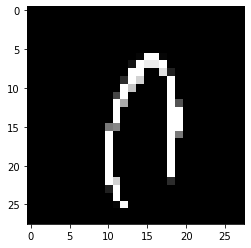

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


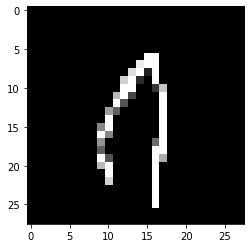

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


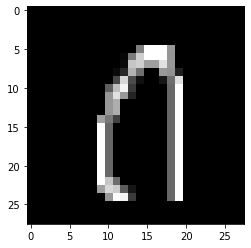

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


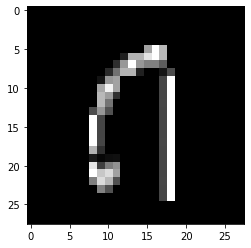

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


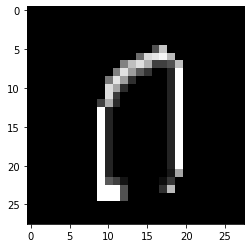

In [10]:
#show data 

for i in range(5):
    plt.imshow(X_train[i*10+1],cmap = 'gray')
    print(Y_train[i*10+1])
    plt.pause(0.5)


In [11]:
#define model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
#  Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
#  Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [12]:
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
batch_size=32, epochs=30, verbose=2)

2023-01-07 08:04:44.787064: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2023-01-07 08:04:47.143796: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 - 19s - loss: 0.1934 - accuracy: 0.9588 - val_loss: 0.0511 - val_accuracy: 0.9849
Epoch 2/30
1563/1563 - 5s - loss: 0.0380 - accuracy: 0.9900 - val_loss: 0.0331 - val_accuracy: 0.9908
Epoch 3/30
1563/1563 - 5s - loss: 0.0293 - accuracy: 0.9918 - val_loss: 0.0654 - val_accuracy: 0.9811
Epoch 4/30
1563/1563 - 5s - loss: 0.0264 - accuracy: 0.9927 - val_loss: 0.0257 - val_accuracy: 0.9921
Epoch 5/30
1563/1563 - 5s - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0545 - val_accuracy: 0.9822
Epoch 6/30
1563/1563 - 5s - loss: 0.0214 - accuracy: 0.9935 - val_loss: 0.0349 - val_accuracy: 0.9916
Epoch 7/30
1563/1563 - 5s - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0353 - val_accuracy: 0.9903
Epoch 8/30
1563/1563 - 6s - loss: 0.0224 - accuracy: 0.9932 - val_loss: 0.0263 - val_accuracy: 0.9936
Epoch 9/30
1563/1563 - 6s - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0358 - val_accuracy: 0.9893
Epoch 10/30
1563/1563 - 5s - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.0878 - val_accura

In [13]:
#check
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)
# plt.imshow(X_test[4].reshape(28,28), cmap='gray')
# y_predict = model.predict(X_test[4].reshape(1,28,28,1))
# print(np.argmax(y_predict))



[1.0745073556900024, 0.7769531011581421]


In [14]:
pred = []
submit = pd.read_csv("/kaggle/input/Kannada-MNIST/test.csv")
X_submit = submit.drop("id",axis = 1)
X_sub = np.array(X_submit)
X_sub = X_sub.reshape(X_sub.shape[0],28,28,1)
for i in range(len(X_sub)):
    y_predict = model.predict(X_sub[i].reshape(1,28,28,1))
    pred.append(np.argmax(y_predict))

In [15]:
image_id = [i for i in range(len(pred))]
outfile = 'submission.csv'
result = {'id':image_id, 'label':pred}
df = pd.DataFrame(data=result)
df.to_csv(outfile, index=False)
print('Finished creating subsmission file {}'.format(outfile))

Finished creating subsmission file submission.csv
